# <center>Fashion MNIST Dataset</center>

**Labels**  

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

## Modules

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 5s 1us/step


In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

## Visualize the data

In [10]:
plt.gray()

<Figure size 640x480 with 0 Axes>

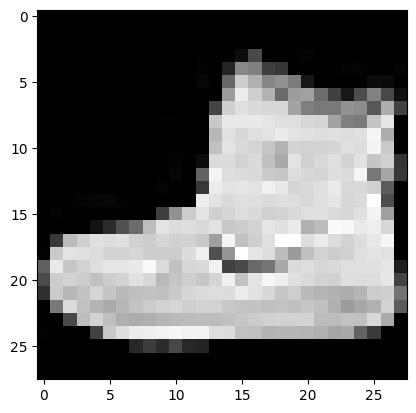

In [11]:
plt.imshow(X_train[0])

In [15]:
y_train[0]

9

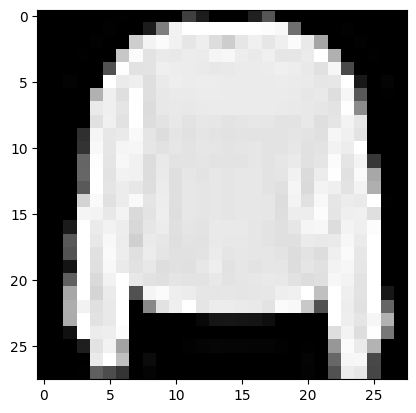

In [16]:
plt.imshow(X_train[7])

In [17]:
y_train[7]

2

## Data Preprocessing

In [24]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_train_cat.shape

(60000, 10)

In [25]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [29]:
y_test_cat = to_categorical(y_test, num_classes=10)
y_test_cat.shape

(10000, 10)

### Scaling each data into 0 to 1

In [30]:
X_train = X_train / 255
X_test = X_test / 255

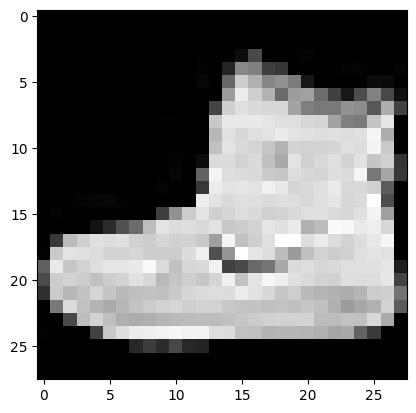

In [31]:
plt.imshow(X_train[0])

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
X_train = X_train.reshape(60000, 28, 28, 1)
# batcH_size, width, height, color_channels

In [34]:
X_test = X_test.reshape(10000, 28, 28, 1)

## Model Training

In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),
                input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [49]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [55]:
model.fit(X_train, y_cat_train, epochs=10, 
          validation_data=(X_test, y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0568 - accuracy: 0.9795 - val_loss: 0.3683 - val_accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0515 - accuracy: 0.9814 - val_loss: 0.3960 - val_accuracy: 0.9109
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0437 - accuracy: 0.9847 - val_loss: 0.4006 - val_accuracy: 0.9125
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0407 - accuracy: 0.9853 - val_loss: 0.4269 - val_accuracy: 0.9092
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0360 - accuracy: 0.9875 - val_loss: 0.4485 - val_accuracy: 0.9120
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0293 - accuracy: 0.9898 - val_loss: 0.4631 - val_accuracy: 0.9135
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0329 - accuracy: 0.9882 - val_loss: 0.5369 -

In [56]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.056762,0.979467,0.368292,0.9129
1,0.051484,0.981433,0.395994,0.9109
2,0.043731,0.984733,0.400607,0.9125
3,0.040680,0.985267,0.426913,0.9092
4,0.036043,0.987517,0.448452,0.9120
5,0.029339,0.989800,0.463100,0.9135
6,0.032895,0.988167,0.536880,0.9060
7,0.029216,0.989617,0.576563,0.9036
8,0.025447,0.991167,0.576012,0.9063
9,0.025818,0.991233,0.542184,0.9073


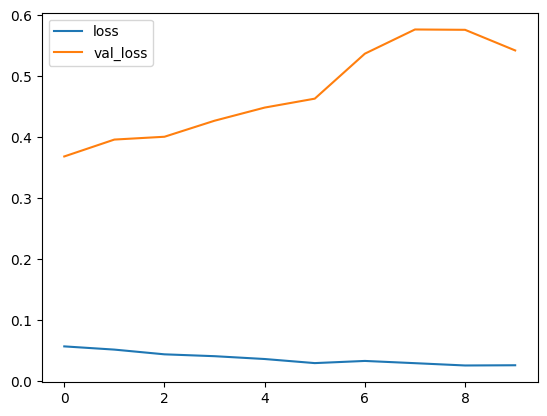

In [57]:
metrics[['loss', 'val_loss']].plot()
plt.show()

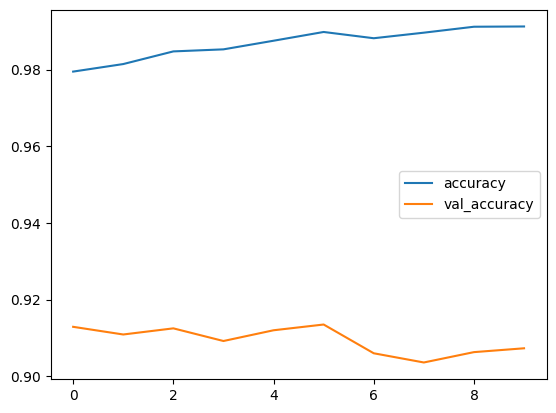

In [58]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.show()

In [59]:
model.evaluate(X_test, y_cat_test, verbose=True)

313/313 [==============================] - 2s 6ms/step - loss: 0.5422 - accuracy: 0.9073


[0.5421841144561768, 0.9072999954223633]

In [61]:
model.evaluate(X_train, y_cat_train, verbose=True)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0276 - accuracy: 0.9899


[0.027556248009204865, 0.9898666739463806]

In [62]:
predict = model.predict(X_test) 
predict_class = np.argmax(predict, axis=1)

313/313 [==============================] - 2s 6ms/step


In [63]:
print(classification_report(y_test, predict_class))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.83      0.86      0.84      1000
           3       0.92      0.91      0.92      1000
           4       0.84      0.87      0.86      1000
           5       0.98      0.99      0.98      1000
           6       0.75      0.71      0.73      1000
           7       0.98      0.95      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [64]:
confusion_matrix(y_test, predict_class)

array([[833,   1,  19,  11,   4,   2, 120,   0,  10,   0],
       [  0, 984,   0,  10,   3,   0,   1,   0,   2,   0],
       [ 14,   1, 856,  11,  61,   1,  56,   0,   0,   0],
       [ 18,   5,  12, 914,  21,   1,  23,   0,   5,   1],
       [  3,   3,  59,  24, 873,   0,  36,   0,   2,   0],
       [  0,   0,   0,   0,   0, 986,   0,   4,   0,  10],
       [ 92,   7,  79,  18,  78,   0, 715,   0,  11,   0],
       [  0,   0,   0,   0,   0,  12,   0, 951,   0,  37],
       [  6,   0,   1,   1,   1,   2,   2,   0, 987,   0],
       [  0,   0,   1,   0,   0,   5,   0,  20,   0, 974]], dtype=int64)

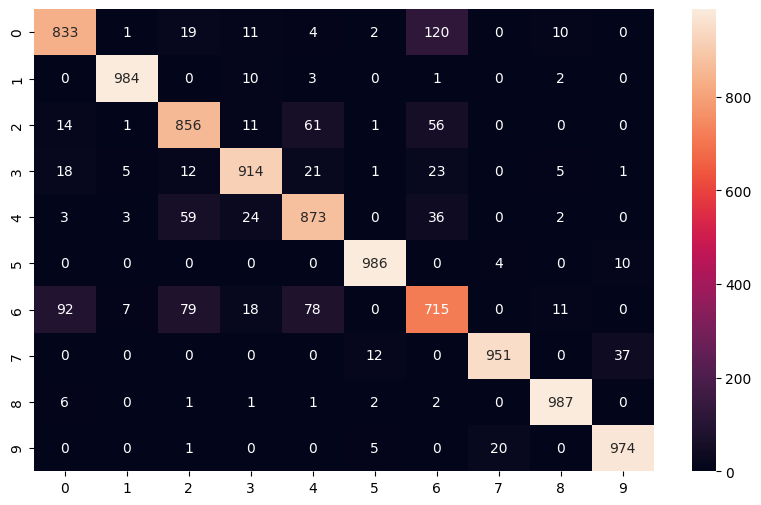

In [65]:
plt.figure(figsize=(10, 6))

sns.heatmap(confusion_matrix(y_test, predict_class), annot=True, fmt='.0f')
plt.show()

In [66]:
predict = model.predict(X_test[1].reshape(1, 28, 28, 1)) 
predict_class = np.argmax(predict, axis=1)

predict_class

1/1 [==============================] - 0s 32ms/step


array([2], dtype=int64)

In [74]:
class_dict = {0: 'TShirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [108]:
def predictClass(index):

    predict = model.predict(X_test[index].reshape(1, 28, 28, 1)) 
    predict_class = np.argmax(predict, axis=1)
    
    print("The predicted class is", class_dict[tuple(predict_class)[0]])
    print("The actual class is", class_dict[y_test[index]])
    plt.imshow(X_test[index])
    plt.show()

1/1 [==============================] - 0s 44ms/step
The predicted class is Pullover
The actual class is Pullover


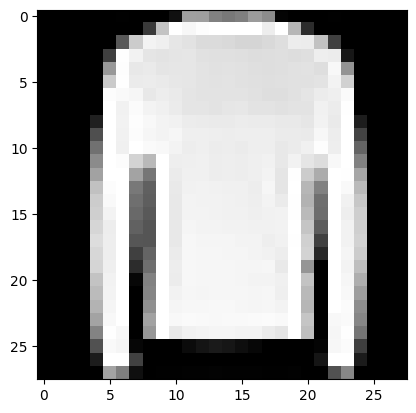

In [139]:
predictClass(77)